In [1]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
print('Notebook run using keras:', keras.__version__)

Using TensorFlow backend.


Notebook run using keras: 2.1.6


In [2]:
tf.__version__

'1.10.0'

In [3]:
keras.__version__

'2.1.6'

In [5]:
inet_model = inc_net.InceptionV3()

96116736/96112376 [==============================] - 123s 1us/step


In [36]:
from keras.applications import inception_resnet_v2 as inc_net_resv2

In [37]:
inet_model_resv2 = inc_net_resv2.InceptionResNetV2()

In [6]:
%pwd

'D:\\Machine_Learning\\Projects\\XAI Samples'

In [7]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

('n02279972', 'monarch', 0.99117309)
('n04141327', 'scabbard', 0.00020581148)
('n02088238', 'basset', 0.00017268567)
('n02514041', 'barracouta', 0.00015634706)
('n02804610', 'bassoon', 0.00013732022)


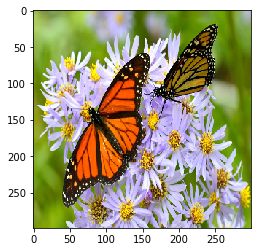

In [48]:
images = transform_img_fn([os.path.join('test','4.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

('n02279972', 'monarch', 0.94750845)
('n02281787', 'lycaenid', 0.00053436059)
('n02277742', 'ringlet', 0.00048189948)
('n12998815', 'agaric', 0.00046722934)
('n07711569', 'mashed_potato', 0.00044291138)


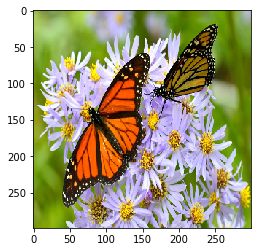

In [49]:
#Par 2 with Resnet
images = transform_img_fn([os.path.join('test','4.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model_resv2.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [11]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
explainer = lime_image.LimeImageExplainer()

In [50]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

Wall time: 7min 41s


In [40]:
%%time
#Par 2 with Resnet
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation_resnetv2 = explainer.explain_instance(images[0], inet_model_resv2.predict, top_labels=5, hide_color=0, num_samples=1000)

Wall time: 14min 11s


In [28]:
from skimage.segmentation import mark_boundaries

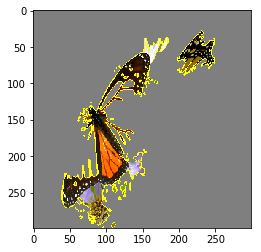

In [51]:
temp, mask = explanation.get_image_and_mask(323, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
#Hamster 333
#Mousetrap 674

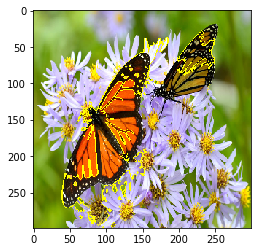

In [52]:
temp, mask = explanation.get_image_and_mask(323, positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

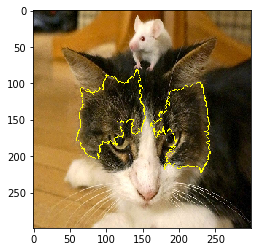

In [41]:
#Par 2 with Resnet
temp, mask = explanation_resnetv2.get_image_and_mask(281, positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))